In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from numpy.random import Generator, PCG64

# Noise Induced Bifurcations, part 2

At the end of Lecture 5, we have considered some observations about the NIT that we have found for our harvest process. In this lecture we will try to answer those questions in the most complete way looking both to the qualitative analysis of the problem and the numerical simulations. We will consider the same problem of Lecture 5

**PROBLEM**: Let's consider a forest in which we have a normalized, upon the logistic carry value, amount of biomass $x$. The forest grows or shrinks accordingly to the logistic law. However this forest is not so uncontaminated by the human presence and some companies conducts lumberjack activities in the region cutting of a certain percentage of trees. So the equation for our deterministic problem is given by:

$$
\frac{dx}{dt}=a_0\left(x(1-x)\right)-kx
$$

where $\alpha$ is a reinforcement parameter for the growth and $k$ is the intensity of the deforestation activities. We are still missing something: the growth capability of the forest is not fixed in time but have a perturbation so $a_0\rightarrow a_0+s\xi(t)$. So our equation become:

$$
\frac{dx}{dt}=a_0\left(x(1-x)\right)-kx+s(x(1-x))\xi(t)
$$

But now our request would be:

**REQUEST**: Perform a complete study about the bifurcations and the NIT for the harvest process

## NIT for greater $s$

### Step 1

Last time we have studied the harvest process for a noise parameter going from 0 to the values immediately after the fork bifurcation at $s=\sqrt{a_0-k}\approx 0.84$. We will keep for now fixed the two deterministic parameters $a_0=1.0$ and $k=0.3$. Let's try to understand what happens for $s$ greater than the bifurcation value previously find working at first with some qualitative analysis. We will start from our previous obtain parameter space:

<img src="Starting_scheme.PNG" alt="drawing" width="600"/>

In [2]:
######## LOOK TO THE BLACKBOARD PLEASE ###############################

### Step 2

With our final informations we can start to verify our qualitative analysis with a more systematic approaches. Now there are quite a lot of feature we can look for: if we would like some more precise informations about the critical points and their position we can either solve numerical the inequality or giving creating a complex trucantion system that produce a certain number of simulation and consider only the section with a certain probability greater or equal than a certain value. In this second step I will look to a way to solve easily with a decent error the inequality in a form that will be useful for us.

First let's repeat our inequality for the $P_s'$

$$
a_0(1-x)-k\geq s^2(1-x)(1-2x) \quad\Rightarrow\quad a_0(1-x)-k-s^2(1-x)(1-2x)\geq 0
$$

To draw our parameter space we can simply create a grid for the space $s-x$. For each point of the grid we will compute the inequality and with this value using color we will able to draw the area where the derivative of $P_s$ is positive and negative.

In [3]:
N = 500
a_0 = 1.0
k = 0.3

x = np.linspace(0,1,N)
s = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(s)):
        values[i,j] = a_0*(1-x[i])-k-s[j]*s[j]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values[i,j] = 1
        else:
            values[i,j] = -1

print(values)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


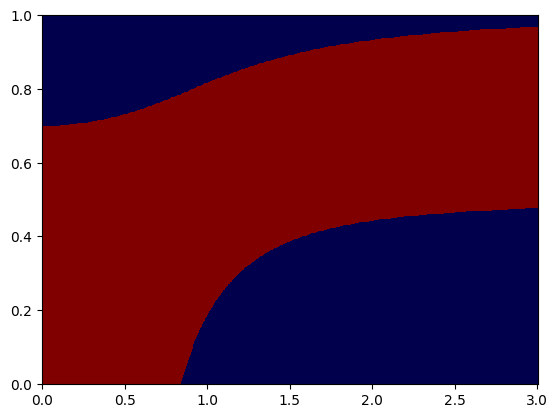

In [4]:
plt.pcolormesh(s,x,values,cmap="seismic")

Perfect! We have perfectly found our predictions in a very simple way! We can stop to this domain for $s-x$ because we know that there are no other bifurcations moving farther with $s$.


Another common methods which can produce data that can be processed both by humans both machines is to produce for each point the simulations and with those produce the probability distribution. In this way we will obtain a distribution for each point of the grid. These distributions can be analyze looking directly one-by-one or, if some we are looking to some specific features, can be processed to obtain a lot more of informations both about the behaviour of our system both about the quality of our simulations. We will talk about this kind of analysis in the future but for now let's stay to this kind of graphics.

## NIT for other combinations of $a_0$ and $k$

### Step 1

Now let's move on to our second question: this behaviour are preserved for any combinations of $a_0$ and $k$? 

### Step 2

Ok so let's try to look via simulations what happens if $1>k/a_0>1/2$ which will produce, as seen, some sort of changes in the behaviour of the carry point and the general point. Let's start with some qualitative analysis. 

In [5]:
######## LOOK TO THE BLACKBOARD PLEASE ###############################

And now let's check this deductions with simulations

In [6]:
#We need to change the function, the class vars and the stochastic formula

class Harvest(object):
    '''
    This function will simulate trajectories for an initialize
    perturbed logistic system
    '''

    #CONSTRUCTOR
    def __init__(self,a0: float,k: float,s:float)->None:
        self.a0 = a0
        self.k = k
        self.s = s

        if(a0<=0 or k<=0 or s<=0):
            raise RuntimeError("One of the given parameter is 0 or negative")
        
        return

    def __checkInputs(self,x0: float,T: float,N: int)->None:
        '''
        Given the inputs for a trajectory, this method will
        check if they are correct
        '''
        #x0 checks:
        if x0<0:
            raise RuntimeError("Initial population must be positive")

        #T checks:
        if T<0:
            raise RuntimeError("Time interval must have a positive lenght")

        #N checks:
        if N<=1:
            raise RuntimeError("The simulation must have at least two steps")

        return

    def __RK4(self,t_n: float,y_n: float,h: float)->float: 
        '''
        Given a point in the trajectory, the time instant and the step lenght,
        this method will compute the variation for y using the RK4 for the 
        deterministic part of the PLS
        '''
        #Perform the check of the inputs. For N we hard code a good 
        self.__checkInputs(y_n,t_n,10)
        
        if h<=0:
            raise RuntimeError("Given h is negative or 0")

        f = lambda x: self.a0*x*(1-x)-self.k*x
        
        k_1 = f(y_n)
        k_2 = f(y_n+h*k_1/2)
        k_3 = f(y_n+h*k_2/2)
        k_4 = f(y_n+h*k_3)

        return h*(k_1+2*k_2+2*k_3+k_4)/6
        
        
    
    def simulateTraj(self,x0: float,T: float,N: int): 
        '''
        Given the initial population value x0, the considered interval lenght T
        and the number of step in the computation N, this method will return a
        trajectory for the PLS.
        '''
        #Check the inputs
        self.__checkInputs(x0,T,N)

        if T==0:
            return np.array([x0])

        #Setup step lenght and traj array
        h = T/N
        traj = np.zeros(N+1,dtype=float)
        traj[0] = x0
        time = np.zeros(N+1,dtype=float)
        time[0] = 0.0

        #Setup random generator
        rng = Generator(PCG64())

        for i in range(1,N+1):
            time[i] = i*h
            dx = self.__RK4(time[i-1],traj[i-1],h) #determinstic part
            dx += self.s*traj[i-1]*(1.0-traj[i-1])*rng.normal()*np.sqrt(h) #noise part
            traj[i] = traj[i-1] + dx
            if traj[i]<0: traj[i]=0.0

        return traj,time

In [7]:
omega = [0.0,1.0] #0,100
Nbins = 150 #100
Nsim = 10000 #10000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1.0,0.75,0.25)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

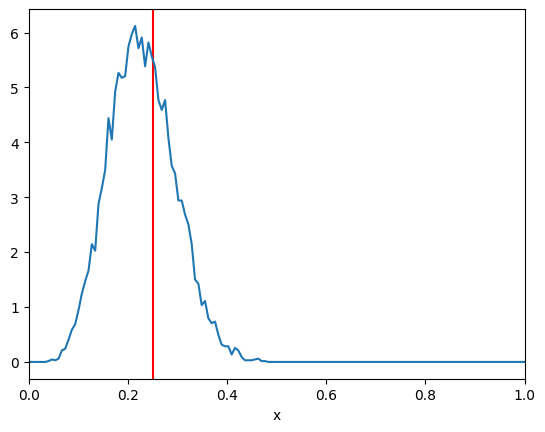

In [8]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.axvline(x = 0.25, color = 'r')
plt.xlim(0.0,1.0)
plt.plot(x,bins)

In [9]:
omega = [0.0,1.0] #0,100
Nbins = 150 #100
Nsim = 10000 #10000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1.0,0.75,0.45)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

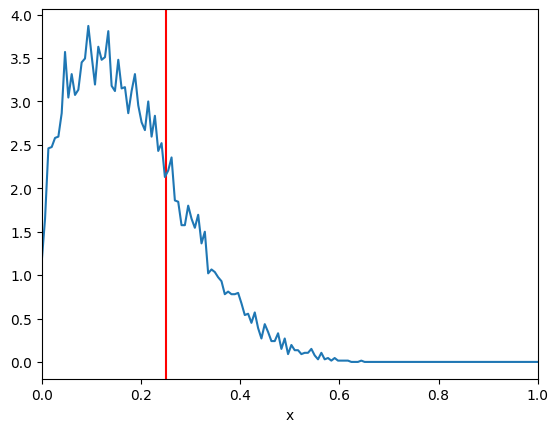

In [10]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.axvline(x = 0.25, color = 'r')
plt.xlim(0.0,1.0)
plt.plot(x,bins)

In [11]:
omega = [0.0,1.0] #0,100
Nbins = 150 #100
Nsim = 10000 #10000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1.0,0.75,0.55)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

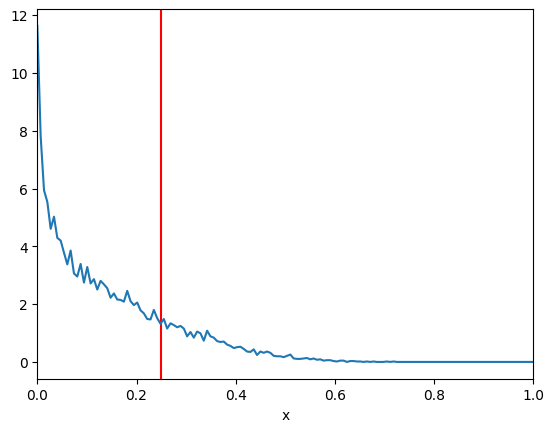

In [12]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.axvline(x = 0.25, color = 'r')
plt.xlim(0.0,1.0)
plt.plot(x,bins)

As said before we can see that for $k/a_0\geq 2/3$ we have the fusion for the transcritical bifurcation and the convergence to 0. If we study this last case but for $k=0.6$ adjusting the noise we will not able to discern the two case and the minimum between them efficiently.

Let's look at the colormesh as before

In [13]:
N = 500
a_0 = 1.0
k = 0.75

x = np.linspace(0,1,N)
s = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(s)):
        values[i,j] = a_0*(1-x[i])-k-s[j]*s[j]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values[i,j] = 1
        else:
            values[i,j] = -1

print(values)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


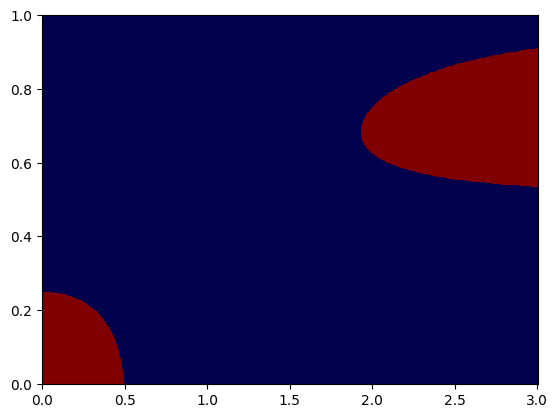

In [14]:
plt.pcolormesh(s,x,values,cmap="seismic")

In [15]:
N = 500
a_0 = 1.0
k = 0.55

x = np.linspace(0,1,N)
s = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(s)):
        values[i,j] = a_0*(1-x[i])-k-s[j]*s[j]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values[i,j] = 1
        else:
            values[i,j] = -1

print(values)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


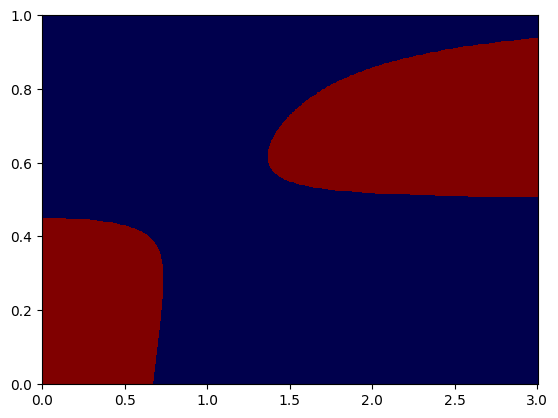

In [16]:
plt.pcolormesh(s,x,values,cmap="seismic")

As observed during the qualitative analysis there is the emergence of a new stable point for high values if the noise is sufficiently strong. Moreover this new region becomes bigger and bigger with $s$. Let's check it using the simulations. We will look only for $k/a_0>2/3$.

In [17]:
omega = [0.0,1.0] #0,100
Nbins = 150 #100
Nsim = 10000 #10000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1.0,0.75,3.0)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),0.25,100) #I have change enormously the parameters to have this expression
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

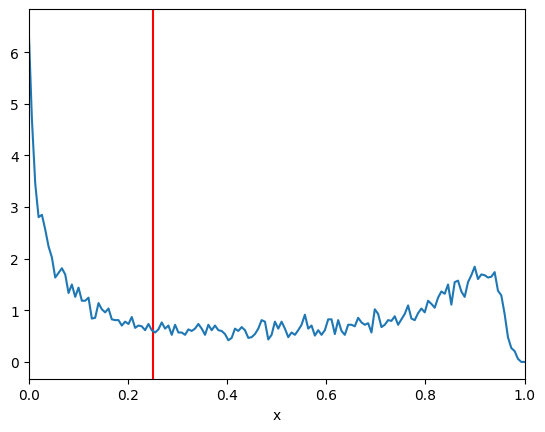

In [18]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.axvline(x = 0.25, color = 'r')
plt.xlim(0.0,1.0)
plt.plot(x,bins)

However as we can see in this situation we found an important limitation of the simulations. In fact having such huge fluctuations that are present in the steady state probability distributions tends to kill almost all the simulations so to be able to obtain the results we need to specifically reduce our "steady state time" because taking this too long will kill the fluctuations. This shows us that in certain condition taking any time instant after a certain value will not produce the same results. 
This can also raise some questions about our simulations about what can happen in nature in this scenario. Without questioning the possibility to have or have not such fluctuations in nature, what we can understand in this situation?

### Step 3

Now we will try to take a look to the NIT when $k/a_0>1$. In this case we have that, also in the deterministic situation, 0 is the only critical point of our problem and it's a global attractor. As alwayse let's do some qualitative analysis 

In [23]:
N = 500
a_0 = 1.0
k = 1.1

x = np.linspace(0,1,N)
s = np.linspace(0,5.0,N)

values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(s)):
        values[i,j] = a_0*(1-x[i])-k-s[j]*s[j]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values[i,j] = 1
        else:
            values[i,j] = -1

print(values)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


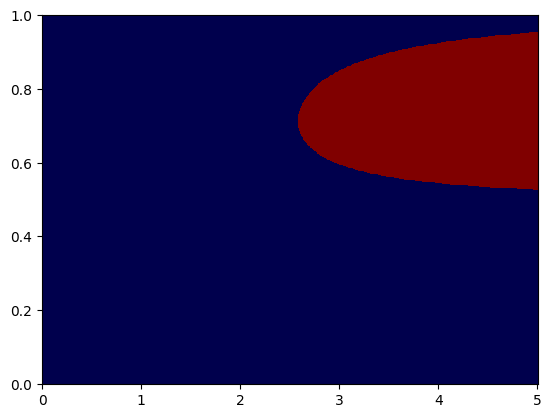

In [24]:
plt.pcolormesh(s,x,values,cmap="seismic")

In [33]:
omega = [0.0,1.0] #0,100
Nbins = 150 #100
Nsim = 10000 #10000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1.0,1.1,0.25)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),20,200) #I have change enormously the parameters to have this expression
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

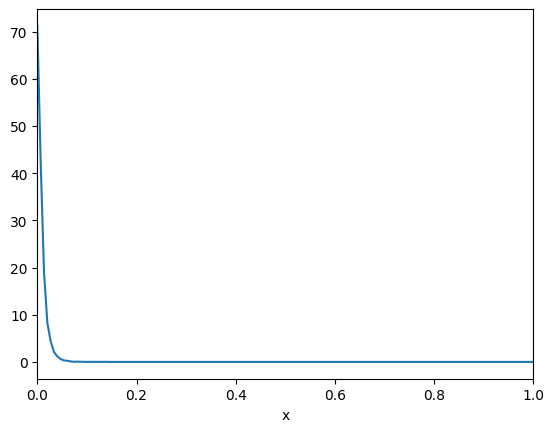

In [35]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

In [37]:
omega = [0.0,1.0] #0,100
Nbins = 150 #100
Nsim = 10000 #10000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1.0,1.1,4.0)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),0.25,100) #I have change enormously the parameters to have this expression
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

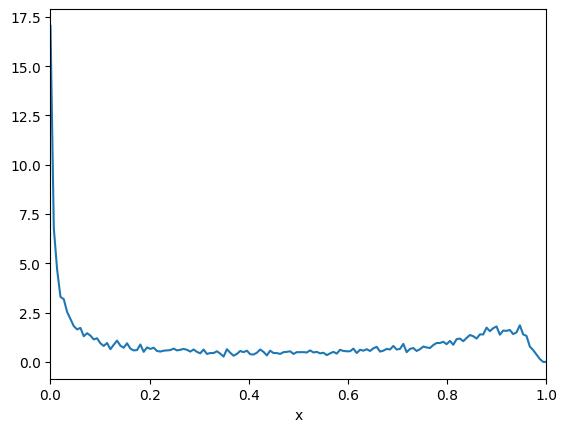

In [38]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

We have finished the complete analysis for our harvest process looking to all the possible menaningful (maybe some of them not realistic) situations. In this notebook we have started to talk about the quality of our simulations confronting with the results of our qualitative analysis that seems to be the most precise method to understand the behaviour of our system in a prioristic sense. However the qualitative analysis, despite maintaining a not-negligible importance, can be very heavy in more complex situations. We need in the future to check the quality of our simulations in a more systematic way than the human eye.